Importing files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Single Gaussian function using a for loop. a is amplitude, b is mu, c is sigma

In [3]:
def gaussian(x, a, b, c):
    result = np.zeros(len(x))
    for i in range(len(x)):
        curr = x[i]
        result[i] = a * np.exp(-1*np.square(curr-b)/(2*np.square(c)))
    return result

Single gaussian function in one line. Returns an array of resulting values reflecting the x value inputs. a is amplitude, b is mu, c is sigma. Set display as 1 to automatically plot the function.

In [4]:
def short_gaussian(x, a, b, c, display=0):
    result = a * np.exp(-1*np.square(x-b)/(2*np.square(c)))
    
    if display == 1:
        plt.plot(x, result)
        plt.show()
    
    return result

Double gaussian function in one line (sum of two gaussians). a, b, and c are for amplitude, mu, and sigma respectively for the first function. d, e, and f are for the amplitdue, mu, and sigma respectively for the second function.

In [5]:
def double_gaussian(x, a, b, c, d, e, f):
    result = a * np.exp(-1*np.square(x-b)/(2*np.square(c))) + d * np.exp(-1*np.square(x-e)/(2*np.square(f)))
    return result

Seven-gaussian function in one line. Sum of seven gaussians. Each a(n), b(n), and c(n) corresponds to the nth set of parameters for the gaussian functions being inputted. c is a constant to determine the offset on the y-axis of the function.

In [6]:
def seven_gaussian(x, c, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6, a7, b7, c7):
    result = c + a1 * np.exp(-1*np.square(x-b1)/(2*np.square(c1))) + a2 * np.exp(-1*np.square(x-b2)/(2*np.square(c2))) + a3 * np.exp(-1*np.square(x-b3)/(2*np.square(c3))) + a4 * np.exp(-1*np.square(x-b4)/(2*np.square(c4))) + a5 * np.exp(-1*np.square(x-b5)/(2*np.square(c5))) + a6 * np.exp(-1*np.square(x-b6)/(2*np.square(c6))) + a7 * np.exp(-1*np.square(x-b7)/(2*np.square(c7)))
    return result

The any_gaussian() function takes in any number of parameters (a constant, followed by n sets of three, where n is the number of gaussian curves that you want to use).

In [7]:
def any_gaussian(x, *all_params):
    sum = all_params[0]
    params = np.array(all_params[1:]).reshape(int(len(all_params[1:])/3.), 3)
    for i in params:
        sum += i[0] * np.exp(-1*np.square(x-i[1])/(2*np.square(i[2])))
    return sum

Sample usage of the first gaussian() function.

In [8]:
x2 = np.linspace(-4, 4, 100)
a2 = -1
b2 = 0
c2 = 0.4

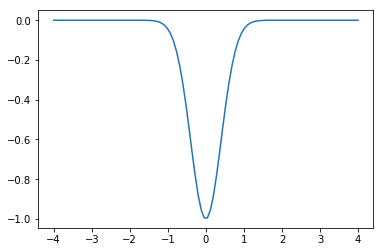

In [9]:
plt.plot(x2, gaussian(x2, a2, b2, c2))
plt.show()

Sample usage of the double_gaussian() function

In [9]:
x3 = np.linspace(-5, 5, 120)
a3 = 1
b3 = 0
c3 = 4

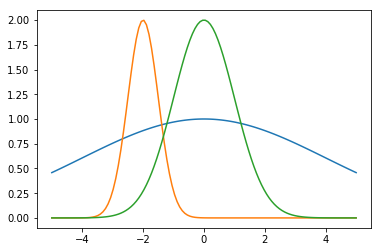

In [10]:
plt.plot(x3, gaussian(x3, a3, b3, c3))
plt.plot(x3, short_gaussian(x3, 2, -2, 0.5))
plt.plot(x3, gaussian(x3, 2, 0, 1))
plt.show()

Sample output for short_gaussian

In [11]:
short_gaussian(x3, 2, -2, 0.5)

array([3.04599595e-08, 8.23265028e-08, 2.16313026e-07, 5.52533151e-07,
       1.37203967e-06, 3.31213215e-06, 7.77286822e-06, 1.77332205e-05,
       3.93302389e-05, 8.48004614e-05, 1.77747093e-04, 3.62192505e-04,
       7.17478797e-04, 1.38169232e-03, 2.58670128e-03, 4.70775522e-03,
       8.32940786e-03, 1.43267289e-02, 2.39559071e-02, 3.89413369e-02,
       6.15377702e-02, 9.45377613e-02, 1.41189218e-01, 2.04988932e-01,
       2.89328991e-01, 3.96996021e-01, 5.29557368e-01, 6.86708681e-01,
       8.65694623e-01, 1.06093692e+00, 1.26399998e+00, 1.46398704e+00,
       1.64839033e+00, 1.80432823e+00, 1.92001088e+00, 1.98620695e+00,
       1.99745942e+00, 1.95282845e+00, 1.85602099e+00, 1.71488236e+00,
       1.54034656e+00, 1.34504004e+00, 1.14178582e+00, 9.42251285e-01,
       7.55929843e-01, 5.89561214e-01, 4.47001498e-01, 3.29474429e-01,
       2.36084301e-01, 1.64454274e-01, 1.11366836e-01, 7.33160839e-02,
       4.69218685e-02, 2.91933542e-02, 1.76573431e-02, 1.03824387e-02,
      

Generating a gaussian curve with noise to fit for practice

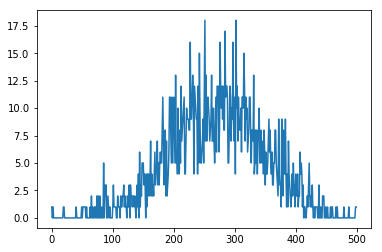

In [12]:
a,b = np.histogram(np.random.randn(2000), bins=500)
plt.plot(a); plt.show()

xdata is an array from 0 to 499 of 500 indexes (0, 1, 2, .... 498, 499)
popt is the useful thing here. it gives the optimal values for the curve fit for the function short_gaussian with xdata and y-values of a, generated from the histogram above. Initial values of amplitude, mu, and sigma are given to help the function

In [13]:
xdata = np.linspace(0, 499, 500)
popt, pcov = curve_fit(short_gaussian, xdata, a, p0=(10,250,10))

Plots the optimized data and fitted graph on top of the original graph with lots of noise.

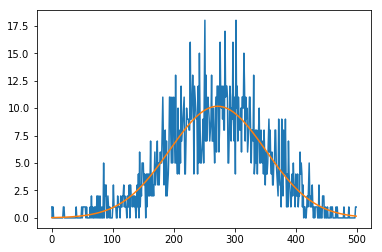

In [14]:
mg = short_gaussian(xdata, *popt)

plt.plot(xdata,a); plt.plot(xdata,mg); plt.show()

Demonstrates that without a histogram to sort the data into a gaussian distribution, it will just be a mess of stuff.

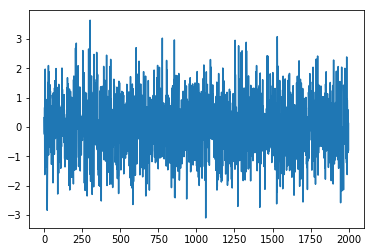

In [15]:
plt.plot(np.random.randn(2000)); plt.show()

Generates a sum of two gaussian curves with plenty of noise to fit as practice

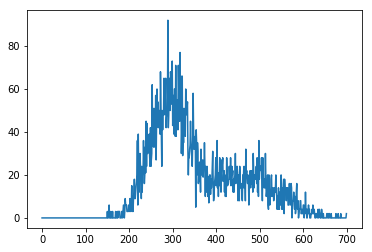

In [16]:
a,b = np.histogram(np.random.randn(2000), bins=500)
c,d = np.histogram(np.random.randn(2000), bins=300)
tot1 = np.arange(700)*0.
tot2 = np.arange(700)*0.
tot1[200:700] = 2*a 
tot2[150:450] = 3*c
tot = tot1+tot2
plt.plot(tot)
plt.show()

Creates an array of 700 values from 0 to 699 that will be the x-values to fit the above graph.

In [17]:
xvals = np.linspace(0, 699, 700)

Executes the curve_fit function using the double_gaussian function because the graph with noise seems to have two gaussians. Initial values are given. the array of optimal values (fit) is printed to visually discern approximate accuracy

In [18]:
fit, cov = curve_fit(double_gaussian, xvals, tot, p0=(50, 290, 30, 25, 480, 50))
print(fit)

[ 53.74253806 292.33630048  45.92660673  19.46674051 464.3045266
  79.0306781 ]


Plots the given noisy double gaussian (tot), the fitted graph, and the two individual gaussians that make up the fitted graph.

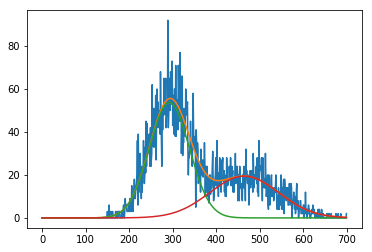

In [19]:
plt.plot(tot)
plt.plot(xvals, double_gaussian(xvals, *fit))
plt.plot(xvals, short_gaussian(xvals,*fit[0:3]))
plt.plot(xvals, short_gaussian(xvals,*fit[3:]))
plt.show()

Loads a quiet sun file and plots it

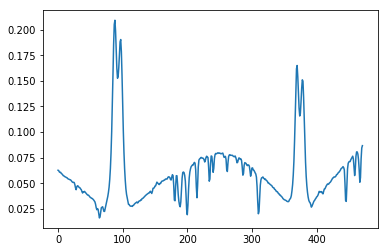

In [20]:
qs = np.load('qs.npy')
plt.plot(qs); plt.show()

xes is an array with length 472, the same length as the array containing the datapoints for the quiet sun array. Goes from 0 to 471 in increments of 1.

In [21]:
xes = np.linspace(0, 471, 472)

Sets initial values for curve_fit to look at

In [22]:
initial_vals = (0.025, 0.08, 0, 90, 0.205, 88, 20, 0.18, 100, 20, 0.08, 250, 280, 0.17, 360, 15, 0.15, 380, 18, 0.1, 480, 300)

Sets bounds for the curve_fit method to use

In [23]:
limits = ([0, 0.01,-100,40, 0.1,60,1, 0.1,95,1, 0.02,200,50, 0.02,350,1, 0.02,372,1, 0.02,420,50],[1, 4,50,500, 6,95,40, 6,105,40, 6,300,400, 6,372,40, 6,398,40, 6,550, 400])

Executes the curve_fit method, where best_vals contains the optimized values. Uses the seven_gaussian method because it seems there are seven gaussians that could be used to represent the graph.

In [24]:
best_vals, pcov = curve_fit(seven_gaussian, xes, qs, p0=initial_vals, bounds=limits, maxfev=100000)

Plots each individual gaussian generated by the optimal values in best_vals

1 1 2 3
2 4 5 6
3 7 8 9
4 10 11 12
5 13 14 15
6 16 17 18
7 19 20 21


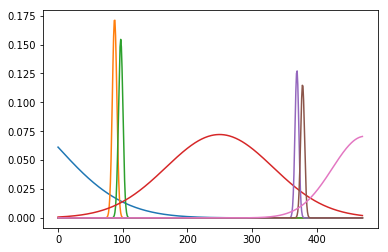

In [25]:
for i in range(1, 8):
    print(i, i*3-2, i*3-1, i*3)
    plt.plot(xes, best_vals[0]+short_gaussian(xes, best_vals[i*3-2], best_vals[i*3-1], best_vals[i*3]))
plt.show()

Plots the sum of the first two gaussian curves generated by curve_fit

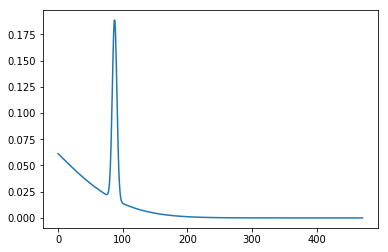

In [26]:
i=2
j=1
plt.plot(xes, best_vals[0]+double_gaussian(xes, best_vals[i*3-2], best_vals[i*3-1], best_vals[i*3], best_vals[j*3-2], best_vals[j*3-1], best_vals[j*3]))
plt.show()

Plots the fitted seven_gaussian curve on top of the given quiet sun graph

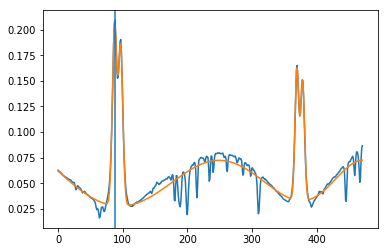

In [27]:
plt.plot(qs)
plt.plot(xes, seven_gaussian(xes, *best_vals))
plt.axvline(x=np.argmax(short_gaussian(xes, best_vals[4], best_vals[5], best_vals[6])))
plt.show()

Loads in a file with a bunch of curves, some of them crazy, all of them to be fitted using the seven_gaussian function

In [28]:
km2fit = np.load('km2fit.npy')
km2fit.shape

(120, 472)

Sets the plot size to be much larger. As it loops through the length of the km2fit array, it prints the index to show its current status (did this because it originally took forever, as the limits array contained bad values). A subplot is created with 10 rows and 12 columns. For each subplot, a best_vals array is generated, and the fitted graph based on seven_gaussian() is plotted on top of the given sun graph.

starting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


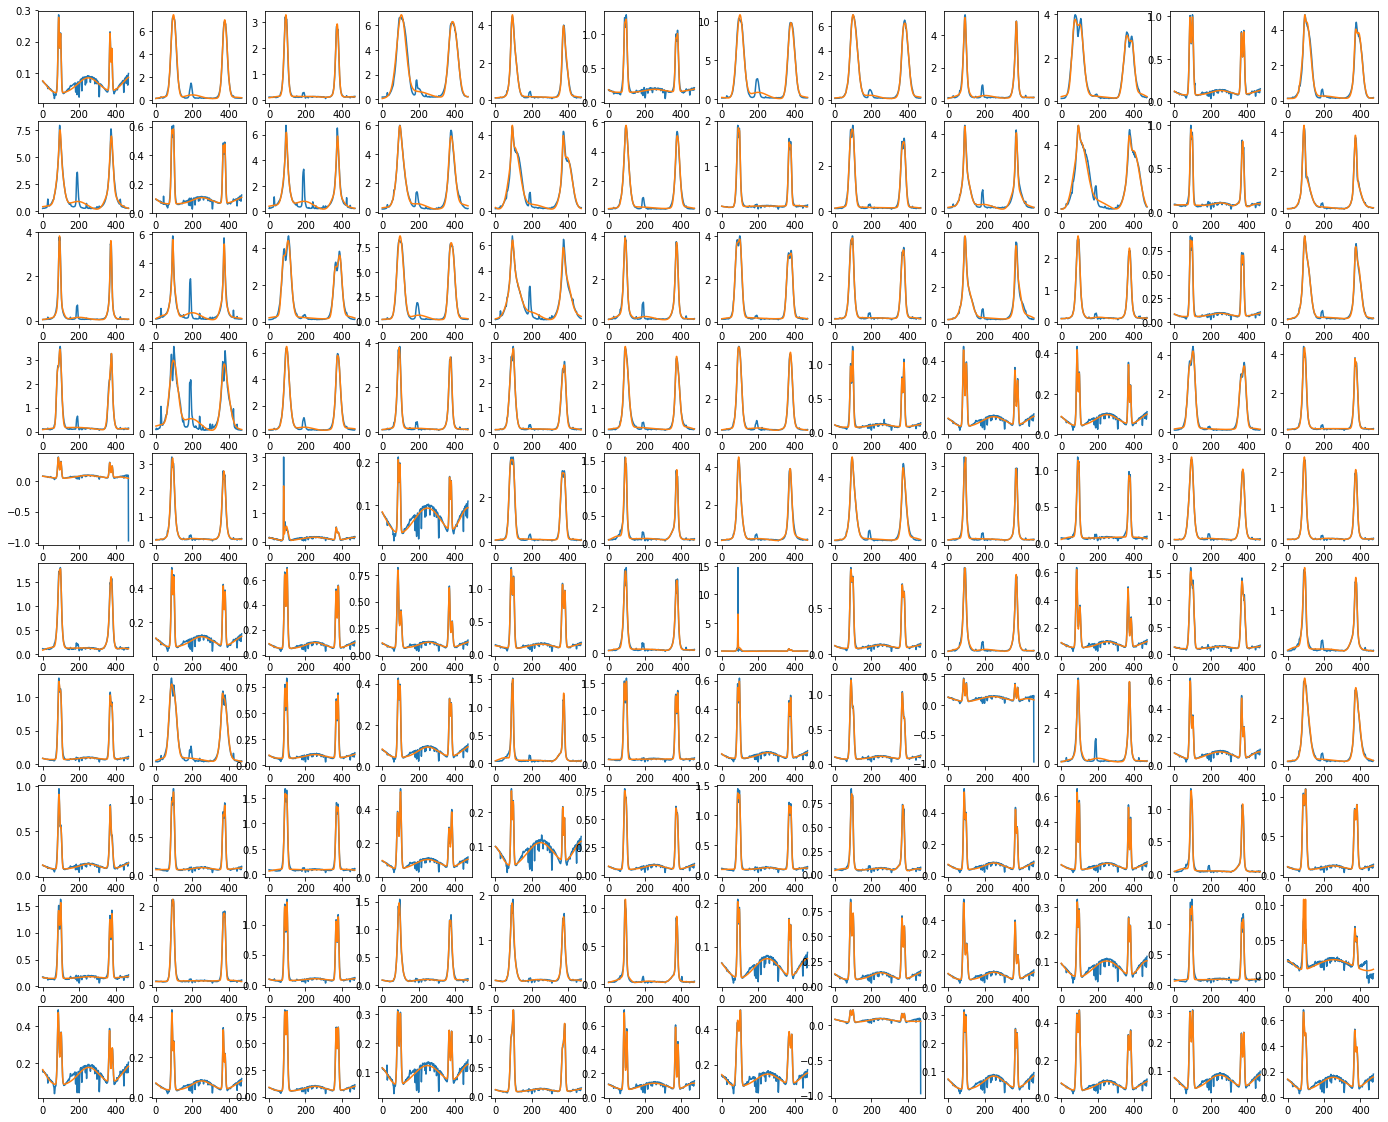

In [29]:
plt.figure(figsize=(24, 20))
print('starting')
for i in range(len(km2fit)):
    print(i)
    plt.subplot(10, 12, i+1)
    best_vals, pcov = curve_fit(seven_gaussian, xes, km2fit[i], p0=initial_vals, bounds=limits, maxfev=10000)
    plt.plot(km2fit[i, :])
    plt.plot(xes, seven_gaussian(xes, *best_vals))
    
plt.show()
